# Initialisation
Ce notebook part des "df_{draw_mode}.csv" créés avec le notebook evolution_score.ipynb, pour étudier la stabilité des résultats des tirages

In [35]:
import pandas as pd

In [36]:
WorkingFolder = "."

In [37]:
draw_mode = "weighted_mode_2" # weighted_mode_2 or equiprobable_mode

In [38]:
list_insee = pd.read_csv(f"{WorkingFolder}/list_insee.csv").squeeze()

In [39]:
def is_mayotte(code_insee):
    return code_insee.startswith('97')

def is_corse(code_insee):
    return ('A' in code_insee) or ('B' in code_insee)

In [40]:
list_insee = [x for x in list_insee if not(is_mayotte(x) or is_corse(x))]

In [41]:
df_meta = pd.read_csv(f"{WorkingFolder}/meta_{draw_mode}.csv", parse_dates=[3])

In [42]:
df_meta

,id,upsert_date,contributor,algo_start_date,batch_nb,mode,init_batch_size,update_batch_size
0,1,2023-10-16 20:29:12.910248+00,jesshuan,2023-10-16 20:20:35.237022+00:00,1,weighted,10000,9113
1,2,2023-10-16 20:36:32.81802+00,jesshuan,2023-10-16 20:20:35.237022+00:00,2,weighted,10000,9172
2,3,2023-10-16 20:44:32.258185+00,jesshuan,2023-10-16 20:20:35.237022+00:00,3,weighted,10000,9109
3,4,2023-10-16 20:51:48.5472+00,jesshuan,2023-10-16 20:20:35.237022+00:00,4,weighted,10000,9116
4,5,2023-10-16 20:59:34.956584+00,jesshuan,2023-10-16 20:20:35.237022+00:00,5,weighted,10000,9190
...,...,...,...,...,...,...,...,...
97,98,2023-10-19 01:41:10.971469+00,jesshuan,2023-10-16 20:20:35.237022+00:00,98,weighted,10000,9109
98,99,2023-10-19 02:45:09.244288+00,jesshuan,2023-10-16 20:20:35.237022+00:00,99,weighted,10000,9100
99,100,2023-10-19 03:48:52.530165+00,jesshuan,2023-10-16 20:20:35.237022+00:00,100,weighted,10000,9132
100,101,2023-10-19 04:52:42.338297+00,jesshuan,2023-10-16 20:20:35.237022+00:00,101,weighted,10000,9128


In [43]:
df_data = pd.read_csv(f"{WorkingFolder}/df_{draw_mode}.csv",index_col=0)
df_data.index = [f"{x:05d}" for x in df_data.index]

In [44]:
df_data.sort_values(by = "draw_99",ascending=False).head(10)

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99,draw_100,draw_101
03286,1376.0,2763.0,4141.0,5509.0,6914.0,8335.0,9719.0,11071.0,12457.0,13914.0,...,129219.0,130584.0,131949.0,133288.0,134684.0,136083,137467,138812,140134,141478
03197,1368.0,2743.0,4110.0,5456.0,6844.0,8256.0,9631.0,10967.0,12328.0,13779.0,...,127984.0,129333.0,130688.0,132013.0,133392.0,134778,136144,137483,138783,140109
87003,1162.0,2358.0,3541.0,4720.0,5860.0,7020.0,8159.0,9337.0,10482.0,11710.0,...,109973.0,111122.0,112308.0,113467.0,114566.0,115754,116894,118090,119231,120424
87149,1156.0,2348.0,3524.0,4695.0,5831.0,6988.0,8119.0,9292.0,10429.0,11648.0,...,109496.0,110642.0,111825.0,112979.0,114076.0,115257,116393,117582,118713,119898
01451,1106.0,2279.0,3422.0,4534.0,5686.0,6893.0,8043.0,9169.0,10316.0,11392.0,...,105913.0,107020.0,108204.0,109334.0,110503.0,111589,112743,113907,115004,116098
01053,1103.0,2273.0,3410.0,4511.0,5658.0,6861.0,8005.0,9124.0,10260.0,11333.0,...,105287.0,106389.0,107569.0,108693.0,109857.0,110938,112086,113246,114338,115424
01350,1099.0,2268.0,3400.0,4501.0,5644.0,6840.0,7979.0,9095.0,10230.0,11301.0,...,105113.0,106215.0,107394.0,108514.0,109674.0,110752,111898,113057,114145,115230
01374,1100.0,2264.0,3399.0,4504.0,5659.0,6859.0,8007.0,9127.0,10266.0,11335.0,...,105088.0,106197.0,107380.0,108499.0,109660.0,110736,111889,113046,114139,115226
01195,1100.0,2268.0,3403.0,4503.0,5647.0,6847.0,7988.0,9105.0,10239.0,11308.0,...,105045.0,106144.0,107322.0,108443.0,109603.0,110684,111829,112986,114077,115161
01024,1093.0,2257.0,3390.0,4493.0,5632.0,6833.0,7975.0,9095.0,10234.0,11297.0,...,105017.0,106111.0,107287.0,108407.0,109570.0,110642,111784,112941,114029,115114


# Creation des scores

In [45]:
df_data_modif = df_data.reindex(list_insee)
df_data_modif = df_data_modif.fillna(0)

In [46]:
batch_size_cumul = df_meta.update_batch_size.cumsum()

In [47]:
df_percent = df_data_modif.div(batch_size_cumul.values,axis=1)

In [48]:
df_percent

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99,draw_100,draw_101
01001,0.000768,0.000820,0.000767,0.000931,0.001007,0.000892,0.000844,0.000794,0.000791,0.000777,...,0.000839,0.000838,0.000840,0.000838,0.000837,0.000843,0.000843,0.000845,0.000847,0.000845
01002,0.000439,0.000383,0.000365,0.000329,0.000460,0.000437,0.000422,0.000411,0.000389,0.000383,...,0.000380,0.000383,0.000385,0.000387,0.000386,0.000388,0.000385,0.000383,0.000385,0.000382
01004,0.101174,0.104785,0.104329,0.103698,0.104223,0.104823,0.105113,0.105059,0.104743,0.104091,...,0.103845,0.103836,0.103906,0.103886,0.103908,0.103866,0.103894,0.103936,0.103895,0.103853
01005,0.000219,0.000109,0.000073,0.000137,0.000109,0.000109,0.000125,0.000110,0.000097,0.000088,...,0.000052,0.000051,0.000052,0.000051,0.000052,0.000051,0.000052,0.000053,0.000053,0.000053
01006,0.000000,0.000000,0.000000,0.000027,0.000022,0.000018,0.000016,0.000014,0.000012,0.000011,...,0.000015,0.000016,0.000016,0.000016,0.000017,0.000017,0.000017,0.000016,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95676,0.000549,0.000383,0.000292,0.000274,0.000241,0.000219,0.000203,0.000192,0.000195,0.000186,...,0.000143,0.000143,0.000144,0.000144,0.000146,0.000146,0.000147,0.000149,0.000149,0.000149
95678,0.003950,0.003664,0.003322,0.003095,0.003173,0.003187,0.003330,0.003327,0.003249,0.003273,...,0.003447,0.003455,0.003460,0.003460,0.003462,0.003458,0.003452,0.003458,0.003457,0.003449
95680,0.001317,0.001367,0.001424,0.001452,0.001510,0.001548,0.001563,0.001602,0.001533,0.001511,...,0.001626,0.001622,0.001635,0.001635,0.001636,0.001637,0.001637,0.001641,0.001637,0.001630
95682,0.001207,0.001094,0.001059,0.001096,0.001225,0.001257,0.001298,0.001328,0.001290,0.001259,...,0.001366,0.001367,0.001373,0.001371,0.001371,0.001369,0.001369,0.001372,0.001368,0.001365


# Etude de stabilité

In [49]:
tolerance = 0.0001 # absolute tolerance

In [50]:
final_score = df_percent.iloc[:,-1]

In [51]:
final_score.to_csv(f"{WorkingFolder}/final_score_{draw_mode}.csv")

In [27]:
df_stability = df_percent.sub(final_score,axis=0)

In [28]:
df_out_tol = df_stability.abs() > tolerance

In [29]:
stability_index = df_out_tol.mul(range(len(df_out_tol.columns)),axis = 1).max(axis=1)

In [30]:
stability_index.max()

98

In [31]:
import matplotlib.pyplot as plt

(array([23895.,  1896.,  1531.,  1048.,   854.,  1018.,  1501.,   898.,
          847.,  1003.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

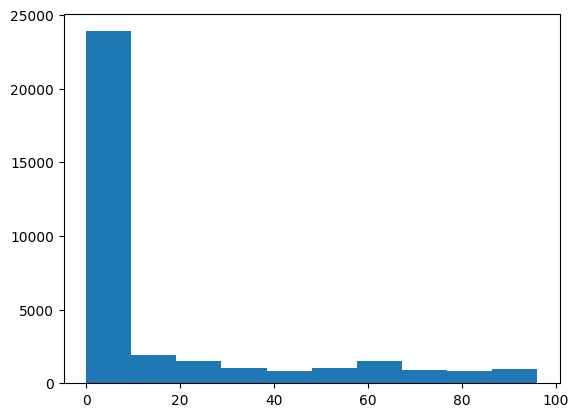

In [23]:

plt.hist(stability_index)

In [138]:
n_unstable = sum(stability_index == len(df_out_tol.columns) -2)

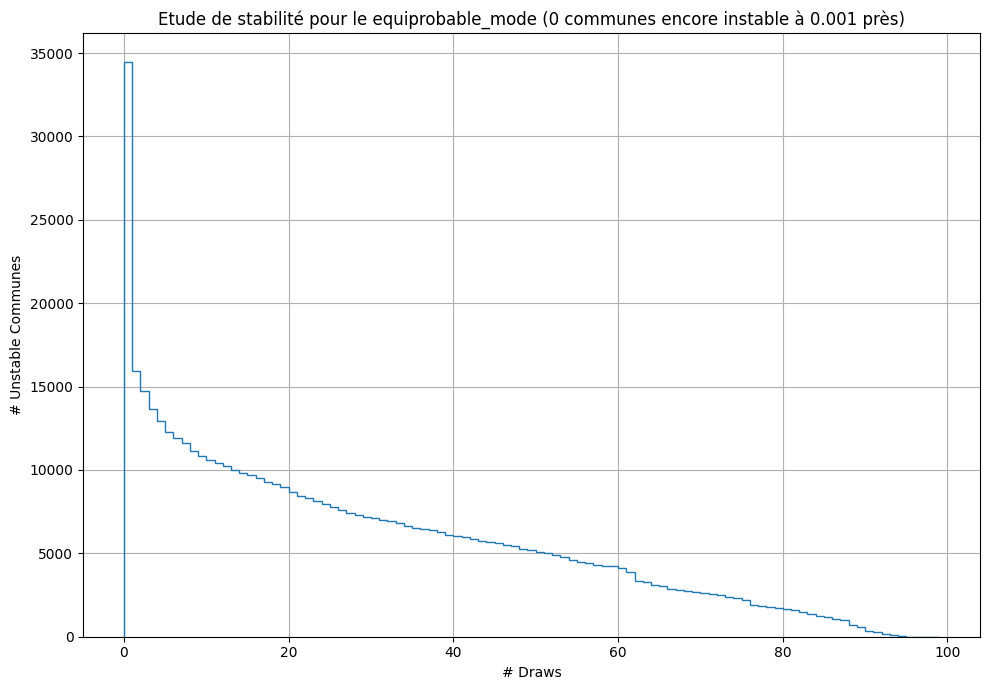

In [139]:
fig = plt.figure(figsize =(10,7))
plt.hist(stability_index, bins=range(len(df_out_tol.columns)), histtype="step", cumulative=-1)
plt.grid()
plt.xlabel('# Draws')
plt.ylabel('# Unstable Communes')
plt.title(f'Etude de stabilité pour le {draw_mode} ({n_unstable} communes encore instable à {tolerance} près)')
plt.tight_layout()

In [140]:
fig.savefig(f"{WorkingFolder}/stability_{draw_mode}_{tolerance}.png")

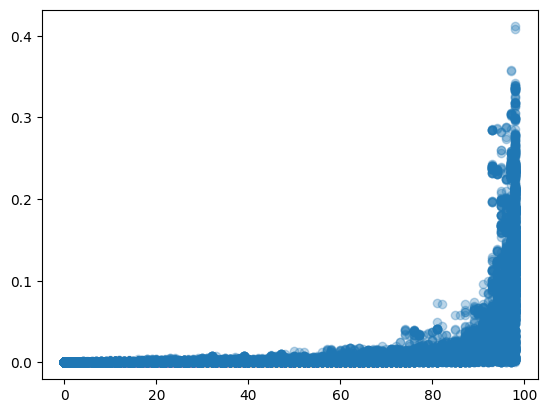

In [33]:
# Stabilité en fonciton du score final
plt.scatter(stability_index,final_score,alpha=0.3)